In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
## Read the dataset
df = pd.read_csv('weight-height.csv')

In [9]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


Text(0, 0.5, 'Height')

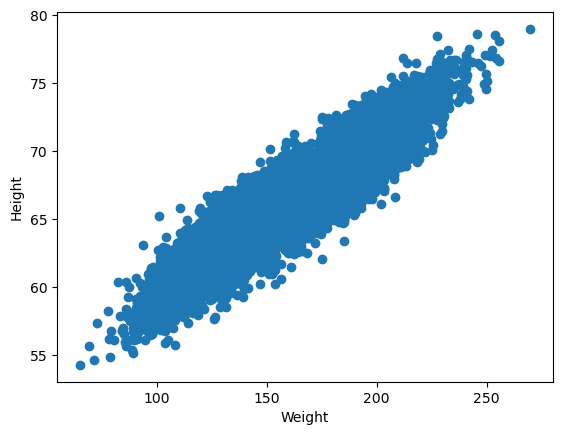

In [10]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [11]:
## Explantory dataset analaysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [12]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [13]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [16]:
## Divide out dataset into independent and dependent features
X=df[['Weight']] ## independent feature
y=df['Height'] ## Dependent feature

In [18]:
X.shape , y.shape


((10000, 1), (10000,))

In [19]:
## Further divide the dataset into train and test
from sklearn.model_selection import train_test_split

In [22]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [23]:
X_train.shape , X_test.shape

((7000, 1), (3000, 1))

In [24]:
y_train.shape , y_test.shape

((7000,), (3000,))

In [32]:
## Standard Scaling on the train and test data
from sklearn.preprocessing import StandardScaler

In [33]:
scaler =StandardScaler()

In [35]:
X_train = scaler.fit_transform(X_train)

In [37]:
X_test= scaler.transform(X_test)

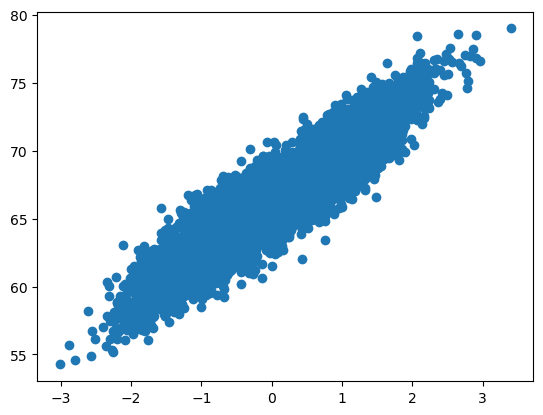

In [38]:
plt.scatter(X_train,y_train)

In [39]:
## Model training
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [40]:
## Training the train data
regressor.fit(X_train,y_train)

LinearRegression()

In [42]:
regressor.intercept_

66.32026277291251

In [43]:
regressor.coef_

array([3.55313486])

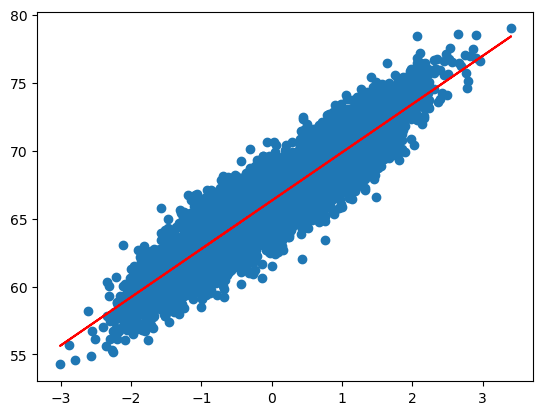

In [49]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r')


### Prediction of train data
1. predicted height output = intercept + coef_(Weights)
2. y_pred_train = 157.5 + 17.03(X_train)

### Predicted of test data
1. Predicted height output = intercept + coef_(Weights)
2. y_pred_test = 157.5 + 17.03(X_test)

In [50]:
## Predicition for test data
y_pred_test = regressor.predict(X_test)

In [51]:
y_pred_test

array([67.66041286, 70.10691508, 67.33877747, ..., 68.6102094 ,
       63.80591546, 69.76411367])

In [52]:
y_test

6252    68.687232
4684    68.829334
1731    66.398128
4742    71.929340
4521    67.042903
          ...    
8014    62.715618
1074    70.123761
3063    69.883451
6487    62.266592
4705    71.528424
Name: Height, Length: 3000, dtype: float64

## Performance Metrices MAE,MSE,RMSE

In [54]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [55]:
mse = mean_squared_error(y_test,y_pred_test)

In [56]:
mae= mean_absolute_error(y_test,y_pred_test)
rmse= np.sqrt(mse)

In [57]:
print(mse)
print(mae)
print(rmse)

2.1085956151270167
1.1600795829040491
1.4521004149600043


## Accuracy of model R squared and Adjusted r Square
## R square

Formula

**R^2 = 1 - SSR/SST**

-R^2 = coefficient of slope

-SSR = sum of squares of resuiduals

-SST = total sum of squares

In [59]:
from sklearn.metrics import r2_score


In [60]:
score = r2_score(y_test,y_pred_test)
score

0.8577922082576351

### Adjusted r Square

**Adjusted R2 = 1 - [(1-R2)*(n-1)/(n-k-1)]**

 where:
        
        R2: The R2 of the model
        n: the number of observations
        k: the number of predictor variables

In [61]:
#dispaly adjusted R-Squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.8577447740375743